#read the file as txt and print
#read file in polaris dataframe

In [2]:
import polars as pl
df=pl.read_csv ("data_1\meteo\VRXA00.202310190000")
type(df)
df

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_8840\3566100879.py:2: SyntaxWarning: invalid escape sequence '\m'
  df=pl.read_csv ("data_1\meteo\VRXA00.202310190000")


15834
str
"""VRXA00 LSSW 190000"""
null
"""iii zzzztttt tre200s0 uor200s0…"
"""187 202310190000 005.1 096.9 0…"


In [3]:
file_path="data_1\meteo\VRXA00.202310190000"

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_8840\1736757009.py:1: SyntaxWarning: invalid escape sequence '\m'
  file_path="data_1\meteo\VRXA00.202310190000"


In [4]:
#read file as text and print contents
with open(file=file_path,mode="r") as fh:
    file_content=fh.readlines()
print(file_content)

['15834\n', 'VRXA00 LSSW 190000\n', '\n', 'iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0\n', '187 202310190000 005.1 096.9 0661.2 001.9 190.4 00000.00 004.9 099.7 0661.1 002.3 233.5 00000.00 003.1 000.0 5.440 99.260\n']


In [5]:
values=file_content[4]
print(values)

187 202310190000 005.1 096.9 0661.2 001.9 190.4 00000.00 004.9 099.7 0661.1 002.3 233.5 00000.00 003.1 000.0 5.440 99.260



In [6]:
file_content

['15834\n',
 'VRXA00 LSSW 190000\n',
 '\n',
 'iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0\n',
 '187 202310190000 005.1 096.9 0661.2 001.9 190.4 00000.00 004.9 099.7 0661.1 002.3 233.5 00000.00 003.1 000.0 5.440 99.260\n']

In [7]:
header=file_content[3]
print(header)

iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0



In [8]:
values=file_content[4].split()
print(values)

['187', '202310190000', '005.1', '096.9', '0661.2', '001.9', '190.4', '00000.00', '004.9', '099.7', '0661.1', '002.3', '233.5', '00000.00', '003.1', '000.0', '5.440', '99.260']


In [9]:
temperature_value=values[2]
print("Temperature value:",temperature_value)

Temperature value: 005.1


In [10]:
import os

# Define the directory path
path = "data_1/meteo"

# Get the list of files in the directory
files = os.listdir(path)

# Initialize lists to store datetime and temperature values
datetimes = []
temperatures = []

# Loop through all files in the directory
for file in files:
    # Skip files with .zip extension
    if ".zip" in file:
        continue
    
    # Extract the datetime (assuming it's the second part when splitting by dot)
    datetime = file.split('.')[1]
    datetimes.append(datetime)

    # Read the file content
    with open(os.path.join(path, file)) as fh:
        file_content = fh.readlines()

    # Extract temperature from the 5th line, 3rd element (index 2)
    temp = file_content[4].split()[2] 
    try:
        temp=float(temp)
    except:
        temp=None
    
    temperatures.append(temp)

# Print the results
print("Temperatures:", temperatures)
print("Datetimes:", datetimes)


Temperatures: [5.1, None, 7.3, 7.0, 7.8, 8.6, 8.0, 8.1, 8.5, 8.6, None, None, None]
Datetimes: ['202310190000', '202310190520', '202310190530', '202310190540', '202310190600', '202310190610', '202310190630', '202310190640', '202310190650', '202310190700', '202401111520', '202401111530', '202401111540']


In [11]:
from datetime import datetime, timezone

datetimes_utc = [
    datetime.strptime(ds, "%Y%m%d%H%M").replace(tzinfo=timezone.utc)
    for ds in datetimes
]
print(datetimes_utc)

[datetime.datetime(2023, 10, 19, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 20, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 5, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 10, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 40, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 6, 50, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 10, 19, 7, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 20, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 1, 11, 15, 40, tzinfo=datetime.timezone.utc)]


In [12]:
header=file_content[3]
print(header)

iii zzzztttt tre200s0 uor200s0 prestas0 fa1010z0 da1010z0 rre150z0 ta1200s0 ua1200s0 pa1stas0 fkl010z0 dkl010z0 ra1150z0 fkl010z1 gor000z0 ta2200s0 ua2200s0



In [13]:
import polars as pl
df = pl.DataFrame(zip(datetimes_utc, temperatures))
df.columns=["dtm", "T"]
df = df.sort("dtm")
df

dtm,T
"datetime[μs, UTC]",f64
2023-10-19 00:00:00 UTC,5.1
2023-10-19 05:20:00 UTC,null
2023-10-19 05:30:00 UTC,7.3
2023-10-19 05:40:00 UTC,7.0
2023-10-19 06:00:00 UTC,7.8
…,…
2023-10-19 06:50:00 UTC,8.5
2023-10-19 07:00:00 UTC,8.6
2024-01-11 15:20:00 UTC,null


In [14]:
header_list=header.split()[2]
print("list of header elements:",header_list)

list of header elements: tre200s0


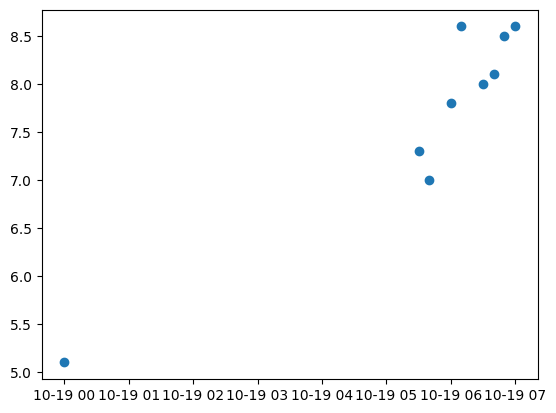

In [15]:

import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(df["dtm"], df["T"])

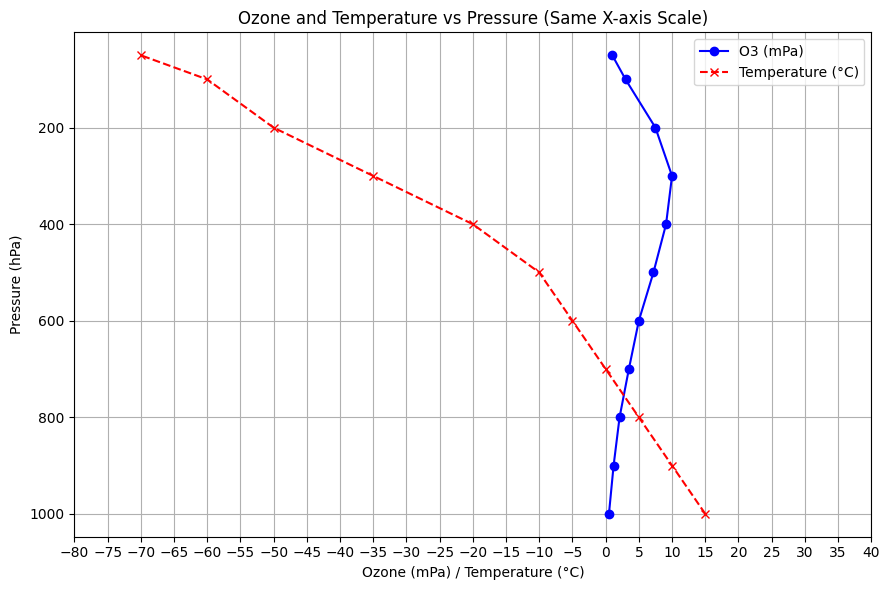

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Press": [1000, 900, 800, 700, 600, 500, 400, 300, 200, 100, 50],
    "O3_mPa": [0.5, 1.2, 2.1, 3.5, 5.0, 7.2, 9.1, 10.0, 7.5, 3.0, 1.0],
    "Temp_C": [15, 10, 5, 0, -5, -10, -20, -35, -50, -60, -70]
}
df = pd.DataFrame(data)

# Plot both ozone and temperature
plt.figure(figsize=(9, 6))
plt.plot(df['O3_mPa'], df['Press'], label='O3 (mPa)', marker='o', color='blue')
plt.plot(df['Temp_C'], df['Press'], label='Temperature (°C)', marker='x', linestyle='--', color='red')

# Invert y-axis
plt.gca().invert_yaxis()

# Set x-axis range and ticks
plt.xlim(-80, 40)
plt.xticks(range(-80, 45, 5))

# Labels and title
plt.xlabel("Ozone (mPa) / Temperature (°C)")
plt.ylabel("Pressure (hPa)")
plt.title("Ozone and Temperature vs Pressure (Same X-axis Scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
